<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Librerías" data-toc-modified-id="Librerías-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Librerías</a></span></li><li><span><a href="#ETL" data-toc-modified-id="ETL-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>ETL</a></span><ul class="toc-item"><li><span><a href="#Análisis-exploratorio" data-toc-modified-id="Análisis-exploratorio-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Análisis exploratorio</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Preprocessing</a></span></li></ul></li><li><span><a href="#Modelos" data-toc-modified-id="Modelos-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Modelos</a></span><ul class="toc-item"><li><span><a href="#Normalizacion" data-toc-modified-id="Normalizacion-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Normalizacion</a></span></li><li><span><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Logistic Regression</a></span></li><li><span><a href="#Desicion-tree" data-toc-modified-id="Desicion-tree-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Desicion tree</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Random Forest</a></span></li></ul></li><li><span><a href="#Conclusiones" data-toc-modified-id="Conclusiones-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Conclusiones</a></span></li></ul></div>

<h1>Ejercicio 6.9 - NLP<span class="tocSkip"></span></h1>
<h3>Marc Jovaní y Laura Oliva<span class="tocSkip"></span></h3>

En este trabajo nuestro objetivo es ayudar a una cadena hotelera a hacer un estudio sobre su personal. Para ello nos proporcionan un conjunto de datos básicos de los empleados junto a las respuestas de una encuesta sobre como puede mejorar su puesto de trabajo la empresa.

Nuesto objetivo final es poroporcionar a la empresa un modelo predictivo para determinar si un empleado se va a quedar en la empresa o no.

# Librerías

In [1]:
# Librerias para el tratamiento y visualización de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from dython.nominal import associations      # cálculo y visualización del coef de asociación entre variables categóricas

# Librerias NLP
import nltk
from string import punctuation
import re                                     #regular expressions
import emoji                                  #emoticonos
import contractions                           #contracciones de texto
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

# Librerias para generar los modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Laura\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Laura\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Laura\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


# ETL

## Análisis exploratorio

In [2]:
# Cargamos los datos del excel
 original_data = pd.read_excel('data/6.9. EmployeeData.xlsx', header = 0, sheet_name = 'RapidMiner Data', engine = 'openpyxl')

In [4]:
# Miramos una muestra de los datos cargados
original_data.head(5)

,CanDoBetter,ID,Training,Est_Income,Benefit,length_of_hire,Facility,DriveTime,Marital,SpousalBenefit,StockPlan,TrainingRecieved,PositionType,Education,Status
0,better non-monetary benefits.,2181.0,Y,60095.20000,Y,58.479532,Facility A,More than 90 mnts,Married,Yes,Yes,No,Sales,"Associate, High school, or Certification",Current
1,company outings,2829.0,Y,47049.07979,N,35.714286,Facility B,0-30 mnts,Married,Yes,No,Yes,Sales,"Associate, High school, or Certification",Current
2,"Having more safety meeting, and discussing wha...",2144.0,Y,60724.12250,Y,17.152659,Facility B,60-90 mnts,Married,Yes,Yes,Yes,Sales,Masters Degree,Past
3,careerpromotions,1356.0,N,63784.21843,Y,5.271481,Facility A,More than 90 mnts,Married,Yes,No,No,Sales,"Associate, High school, or Certification",Past
4,careerpromotions,2807.0,N,87665.23353,N,4.244482,Facility A,More than 90 mnts,Married,Yes,Yes,No,Sales,"Doctorate (PhD, EdD, etc)",Past


In [5]:
# Miramos el número y tipode datos que tenemos en cada columna
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1717 entries, 0 to 1716
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CanDoBetter       1689 non-null   object 
 1   ID                1715 non-null   float64
 2   Training          1715 non-null   object 
 3   Est_Income        1715 non-null   float64
 4   Benefit           1715 non-null   object 
 5   length_of_hire    1715 non-null   float64
 6   Facility          1715 non-null   object 
 7   DriveTime         1715 non-null   object 
 8   Marital           1715 non-null   object 
 9   SpousalBenefit    1715 non-null   object 
 10  StockPlan         1715 non-null   object 
 11  TrainingRecieved  1715 non-null   object 
 12  PositionType      1715 non-null   object 
 13  Education         1715 non-null   object 
 14  Status            1715 non-null   object 
dtypes: float64(3), object(12)
memory usage: 201.3+ KB


In [6]:
# Miramos las dimensiones del dataset
original_data.shape

(1717, 15)


Distribución de la variable target:
 Current    949
Past       766
Name: Status, dtype: int64


<AxesSubplot:>

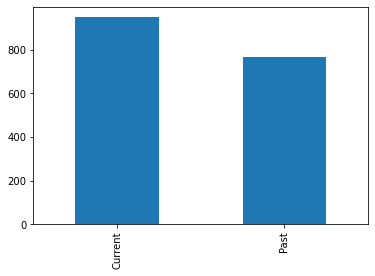

In [7]:
# Miramos la distribución de la variable target
print('\nDistribución de la variable target:\n', original_data['Status'].value_counts())
original_data['Status'].value_counts().plot.bar()

Vemos que:
* Tenemos 1717 registros y 15 columnas, la mayoría de las cuáles de tipo categórico/texto.
* La muestra está suficientemente balanceada en cuanto a la variable dependiente.
* Todas las variables tienen 1715 registros no nulos, excepto *CanDoBetter* (la encuesta), que tiene 26. 
    * Idealmente, queremos quitar los nulos, pero sólo los que nos afecten a la variable target. 
    * Viendo los datos, es problable que tengamos dos filas completamente vacias y 26 personas sin nada en la encuesta.
    * Así, queremos mantener los registros aunque no tengan encuesta.

Intentamos eliminar las columnas que tengan todas las columnas vacias.

In [8]:
# Verificamos que, aparentemente, tenemos dos filas con todas las columnas vacías

original_data.isnull().sum()

CanDoBetter         28
ID                   2
Training             2
Est_Income           2
Benefit              2
length_of_hire       2
Facility             2
DriveTime            2
Marital              2
SpousalBenefit       2
StockPlan            2
TrainingRecieved     2
PositionType         2
Education            2
Status               2
dtype: int64

In [9]:
# Eliminamos los registros que tenga nulos en todas las variables
df = original_data.dropna(thresh = 14)

df.shape

(1715, 15)

In [10]:
# Revisamos el resultado del proceso anterior
df.isnull().sum()

CanDoBetter         26
ID                   0
Training             0
Est_Income           0
Benefit              0
length_of_hire       0
Facility             0
DriveTime            0
Marital              0
SpousalBenefit       0
StockPlan            0
TrainingRecieved     0
PositionType         0
Education            0
Status               0
dtype: int64

Hemos tenido suerte y efectivamente teníamos dos filas vacías, ahora ya podemos pasar al tratamiento de los datos.

Muchos de los datos son strings, de modo que antes de entrenar ningún modelo debemos pasarlos a númerico.

Primero vamos a pasar la columna *ID* como índice, y después vamos a ver la relación entre variables. 

In [11]:
# Establecemos la columna 'ID' como índice

df = df.set_index('ID')


Establecemos la variable target como numérica, para poder analizar las relaciones de las variables predictoras con ella.

In [12]:
# Usamos applymap y una labmda function para cambiar los Past por 1 y los Current por 0 en la variable target
# 0 será la clase negativa, y 1 la clase positiva

df['Status'] = df['Status'].apply(lambda x: 1 if x == 'Past' else 0)

df.head(5)

,CanDoBetter,Training,Est_Income,Benefit,length_of_hire,Facility,DriveTime,Marital,SpousalBenefit,StockPlan,TrainingRecieved,PositionType,Education,Status
ID,,,,,,,,,,,,,,
2181.0,better non-monetary benefits.,Y,60095.20000,Y,58.479532,Facility A,More than 90 mnts,Married,Yes,Yes,No,Sales,"Associate, High school, or Certification",0
2829.0,company outings,Y,47049.07979,N,35.714286,Facility B,0-30 mnts,Married,Yes,No,Yes,Sales,"Associate, High school, or Certification",0
2144.0,"Having more safety meeting, and discussing wha...",Y,60724.12250,Y,17.152659,Facility B,60-90 mnts,Married,Yes,Yes,Yes,Sales,Masters Degree,1
1356.0,careerpromotions,N,63784.21843,Y,5.271481,Facility A,More than 90 mnts,Married,Yes,No,No,Sales,"Associate, High school, or Certification",1
2807.0,careerpromotions,N,87665.23353,N,4.244482,Facility A,More than 90 mnts,Married,Yes,Yes,No,Sales,"Doctorate (PhD, EdD, etc)",1


Antes de decidir que hacer con las variables categóricas vamos a procesar las encuestas para hacer un análisis de sentimiento de los textos y usar estos valores en el modelo.

In [13]:
# Funcion para eliminar las stopwords de un texto
def remove_stopwords(s):
    stop_words = set(stopwords.words('english'))

    word_tokens = word_tokenize(s)

    filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
    
    return ' '.join(filtered_sentence)

# Funcion para limpiar un texto y dejarlo listo para hacer un analisis de sentimiento
def text_cleaning(s):
    s = emoji.demojize(s)
    s = s.lower()
    s = re.sub(' +', ' ', s)
    s = re.sub(r"http\S+", "", s)
    s = contractions.fix(s)
    s = re.sub(r'[^\w\s]','',s)
    s = remove_stopwords(s)
    
    return s

In [14]:
# Usamos apply en la columna de la encuesta para preparar el texto para hacer el analisis de sentimiento
# Reservamos una copia del dataframe, por precaución

df1 = df.copy()
df1['CanDoBetter'] = df1['CanDoBetter'].apply(lambda x: text_cleaning(x) if type(x) == str else x)

In [15]:
# Funcion para calcular el sentimiento de un text
def nltk_calculate_polarity(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_score = analyzer.polarity_scores(text)
    output = sentiment_score['compound']
    return output

In [16]:
# Applicamos la funcion para calcular el sentimento

df1['CanDoBetter'] = df1['CanDoBetter'].apply(lambda x: nltk_calculate_polarity(x) if type(x) == str else 0)
df1.head(5)

,CanDoBetter,Training,Est_Income,Benefit,length_of_hire,Facility,DriveTime,Marital,SpousalBenefit,StockPlan,TrainingRecieved,PositionType,Education,Status
ID,,,,,,,,,,,,,,
2181.0,0.6705,Y,60095.20000,Y,58.479532,Facility A,More than 90 mnts,Married,Yes,Yes,No,Sales,"Associate, High school, or Certification",0
2829.0,0.0000,Y,47049.07979,N,35.714286,Facility B,0-30 mnts,Married,Yes,No,Yes,Sales,"Associate, High school, or Certification",0
2144.0,0.4215,Y,60724.12250,Y,17.152659,Facility B,60-90 mnts,Married,Yes,Yes,Yes,Sales,Masters Degree,1
1356.0,0.0000,N,63784.21843,Y,5.271481,Facility A,More than 90 mnts,Married,Yes,No,No,Sales,"Associate, High school, or Certification",1
2807.0,0.0000,N,87665.23353,N,4.244482,Facility A,More than 90 mnts,Married,Yes,Yes,No,Sales,"Doctorate (PhD, EdD, etc)",1


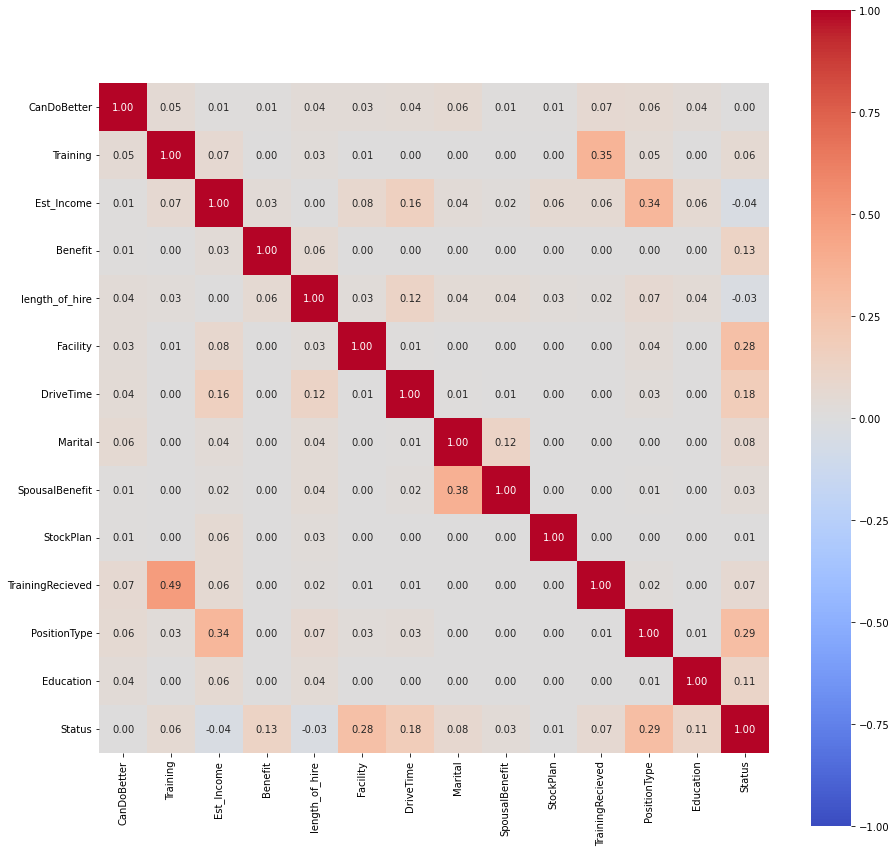

{'corr':                   CanDoBetter  Training  Est_Income   Benefit  length_of_hire  \
 CanDoBetter          1.000000  0.053999    0.008500  0.010705        0.035478   
 Training             0.053999  1.000000    0.065827  0.000719        0.025562   
 Est_Income           0.008500  0.065827    1.000000  0.033731        0.004945   
 Benefit              0.010705  0.000713    0.033731  1.000000        0.061369   
 length_of_hire       0.035478  0.025562    0.004945  0.061369        1.000000   
 Facility             0.034592  0.006007    0.080714  0.003167        0.030246   
 DriveTime            0.042539  0.002132    0.155312  0.001609        0.120402   
 Marital              0.060799  0.000860    0.035901  0.001205        0.040552   
 SpousalBenefit       0.008269  0.000167    0.020793  0.001832        0.044058   
 StockPlan            0.014267  0.000044    0.056129  0.000011        0.025133   
 TrainingRecieved     0.067452  0.487854    0.059346  0.000327        0.021901   
 Positio

In [17]:
# Miramos las correlaciones y asociaciones entre variables
# Usamos la función associations de la librería dython, que permite analizar correlaciones también con variables categóricas
# Para la asociación entre dos variables categóricas, usamos el coeficiente Theil's U, que no presupone simetría entre ellas
# Para la correlación entre variables numéricas, usamos el coeficiente de correlación de Pearson
# Para la relación entre una variable numérica y otra categórica, usamos el ratio de correlación
# Señalamos también que no se presupona simetría en las relaciones

associations(df1, 
             nom_nom_assoc = 'theil', 
             num_num_assoc = 'pearson', 
             nom_num_assoc = 'correlation_ratio', 
             symmetric_nom_nom = False, 
             symmetric_num_num = False, 
             cmap = 'coolwarm',                      # colores de la matriz
             figsize=(15, 15))

Parece que no hay correlaciones importantes entre las variables. Existe una correlación entre el estado civil y los beneficios conyugales recibidos por la empresa, lo cuál es lógico. Por otra parte, hay también cierta correlación con algunas variables categóricas de entre 0.2 y 0.3. No obstante, la mayor relación es entre *Training* y *TrainingReceived*, lo cual es curioso, pues pudiera ser que a menor formación previa, mayor formación ofrece la empresa, o al revés. Vamos a verificar pues:
* La distribución conjunta de las variables Training y Training Recieved, haciendo una tabla de contingencias, que calcule la frecuencia de los valores de cada variable.
* La mirando las relaciones entre status y las variables categóricas,
* y por último las relaciones con las numéricas.

<AxesSubplot:xlabel='Training'>

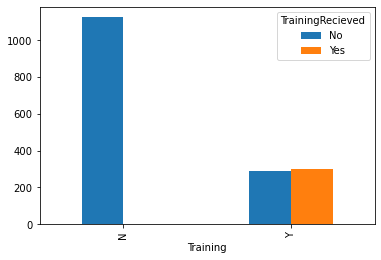

In [18]:
# Usamos la función de pandas crosstab para poder comparar la distribución de ambas variables,
# haciendo una tabla de contingencias
pd.crosstab(df1['Training'], df1['TrainingRecieved']).plot.bar()


Efectivamente, vemos que en la empresa ocurre algo un tanto sorprendente: las personas que no tenían una formación previa (training = 0), tampoco recibieron ninguna formación dentro de la empresa. Por otro lado, entre las personas que sí tenían una formación previa, parece que aproximadamente la mitad recibieron una formación en la empresa y la otra mitad no. Cabría preguntarse si ello es por falta de interés por parte de los empleados, o bien por falta de oferta por parte de la empresa. Vamos a ver la relación con la otra variable relacionada con la formación: Education.  

<AxesSubplot:xlabel='Training'>

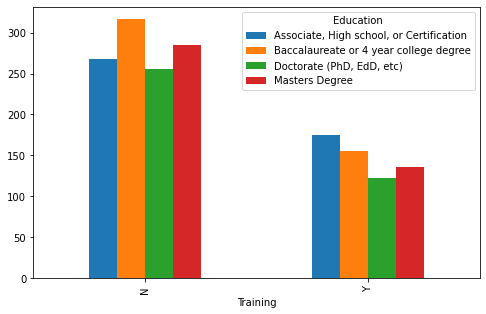

In [19]:
pd.crosstab(df1['Training'], df1['Education']).plot.bar(figsize = (8, 5))

<AxesSubplot:xlabel='TrainingRecieved'>

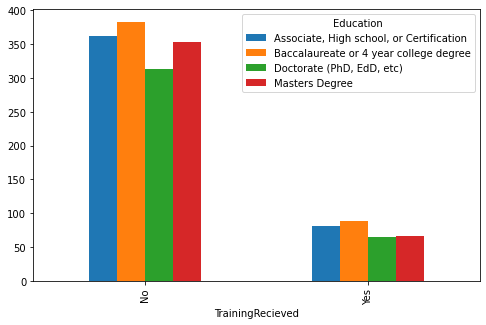

In [20]:
pd.crosstab(df1['TrainingRecieved'], df1['Education']).plot.bar(figsize = (8, 5))

Parece que, proporcionalmente, las personas con una educación reglada más baja reciben algo más de formación por parte de la empresa que el resto, aunque sin grandes diferencias. Es sorprendente también el número de personas con formación universitaria que aparecen como "sin formación previa" (training = 0). Cabe preguntarse a qué se refiere la empresa con la variable *training*.

A continuación vamos a ver la distribución de cada variable categórica en función de la variable target *status*

In [21]:
# seleccionamos todas las variables categóricas
cat_cols = df1.select_dtypes(include=['object']).columns
cat_cols

Index(['Training', 'Benefit', 'Facility', 'DriveTime', 'Marital',
       'SpousalBenefit', 'StockPlan', 'TrainingRecieved', 'PositionType',
       'Education'],
      dtype='object')

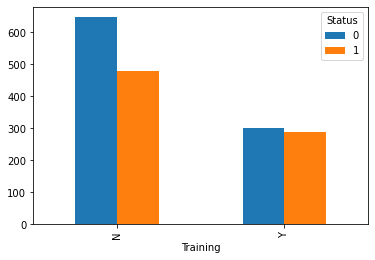

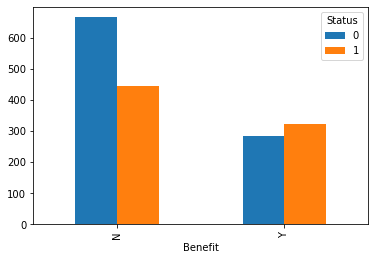

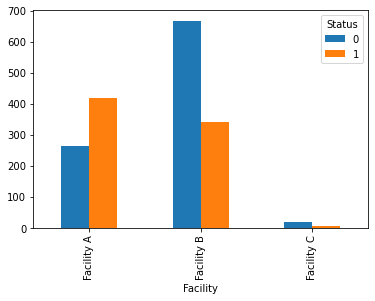

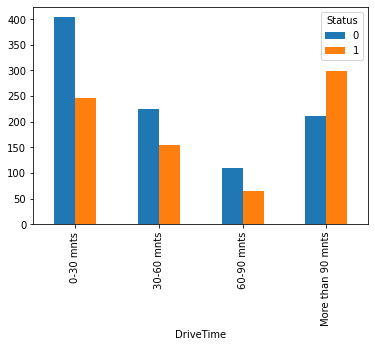

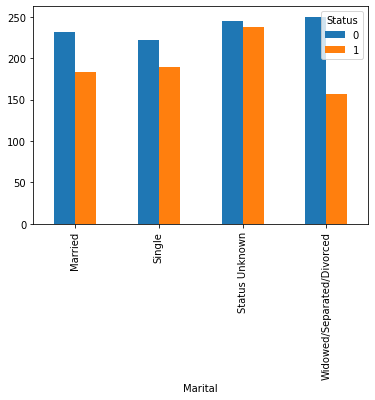

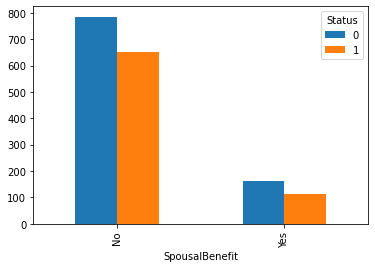

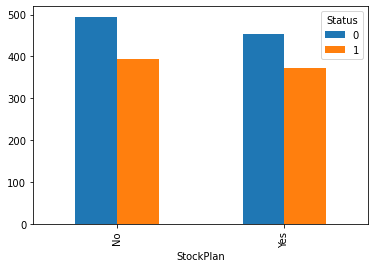

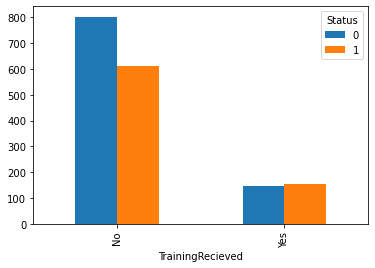

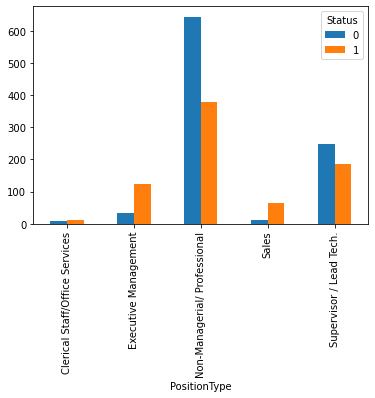

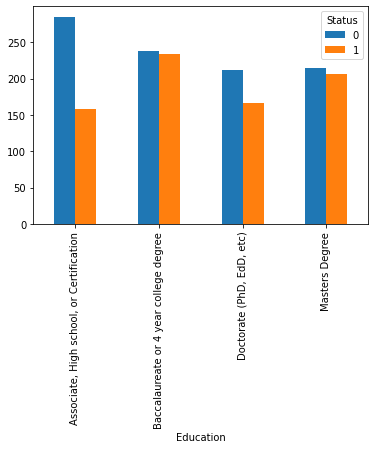

In [22]:
# Hacemos un loop para plotear cada una de ellas
for colum in df1:
    if colum in cat_cols:
        pd.crosstab(df1[colum], df1['Status']).plot.bar()

Podemos ver que hay tres circunstancias en las que abandonar la empresa parece más probable, en tanto que:
* Respecto a la variable *Facility*, entre las personas que tienen *Facility A* la mayoría dejan la empresa.
* Respecto de la variable *DriveTime*, entre las personas que conducen 90 o más minutos para llegar al lugar de trabajo, la mayoría dejan la empresa.
* Respecto a la variable *PositionType*, hay dos posiciones que también tienen más personas que se van de la empresa de las que se quedan: *Executive Manager* y *Sales*. 
* Resulta también interesante que, de entre las personas que recibieron algún beneficio de la empresa (*Benefit*), la mayoría terminaron yéndose. 

Nótese que, en la matriz de correlación anterior, estas variables obtenían coeficiente de asociación con la variable target más altos que las demás variables, y aunque el coeficiente para variables categóricas va de 0 a 1 (en lugar de -1 a 1), éstos no eran muy altos (alrededor de 0.2-0.3).

Vamos a seguir el mismo proceso con las variables numéricas.

In [23]:
# Selecionamos las variables numéricas
num_cols = df1.select_dtypes(exclude = ['object']).columns
num_cols

Index(['CanDoBetter', 'Est_Income', 'length_of_hire', 'Status'], dtype='object')

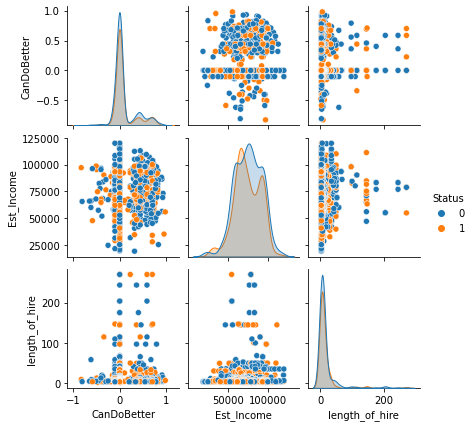

In [24]:
# Hacemos un diagrama de dispersión por pares de las variables numéricas, entre las que se incluye la variable target
# El color azul representa las personas que se quedaron en la empresa; el naranja, las que se fueron

sns.pairplot(df1[num_cols], height=2, hue = 'Status', kind='scatter', diag_kind='kde')

Parece que no hay ninguna variable numérica que tenga una relación clara con el Status final del empleado, a excepción tal vez del salario bruto anual (*Est_Income*); en este caso, vemos que de entre la personas con un sueldo inferior, la mayoría dejaron la empresa, mientras que en rangos superiores la mayoría de los empleados se quedaron en la empresa. Vemos también que, en nuestra muestra, la mayoría de las personas lleva poco tiempo contratada, y que parece que el tiempo y el salario bruto anual no guardan relación. 

Nótese que ni en este digrama de dispersión ni en la matriz de correlación anterior, los valores de la variable de texto, correspondiente a la encuesta realizada a los empleados (*CanDoBetter*) parecen tener valor discriminante respecto a la variable target.  

## Preprocessing 

Vamos a transformar todas las variables en númericas, para poder aplicar los modelos predictivos.

In [25]:
# Usamos applymap y una labmda function para cambiar los Yes por 1 y los No por 0

df2 = df1.applymap(lambda x: 1 if x == 'Y' or x == 'Yes' else x)
df2 = df2.applymap(lambda x: 0 if x == 'N' or x == 'No' else x)

df2.head(5)

,CanDoBetter,Training,Est_Income,Benefit,length_of_hire,Facility,DriveTime,Marital,SpousalBenefit,StockPlan,TrainingRecieved,PositionType,Education,Status
ID,,,,,,,,,,,,,,
2181.0,0.6705,1,60095.20000,1,58.479532,Facility A,More than 90 mnts,Married,1,1,0,Sales,"Associate, High school, or Certification",0
2829.0,0.0000,1,47049.07979,0,35.714286,Facility B,0-30 mnts,Married,1,0,1,Sales,"Associate, High school, or Certification",0
2144.0,0.4215,1,60724.12250,1,17.152659,Facility B,60-90 mnts,Married,1,1,1,Sales,Masters Degree,1
1356.0,0.0000,0,63784.21843,1,5.271481,Facility A,More than 90 mnts,Married,1,0,0,Sales,"Associate, High school, or Certification",1
2807.0,0.0000,0,87665.23353,0,4.244482,Facility A,More than 90 mnts,Married,1,1,0,Sales,"Doctorate (PhD, EdD, etc)",1


Vamos a pasar las variables categoricas a dummies con one hot encoders.

In [26]:
# Funcion para cambiar una lista de columnas categoricas a calumnas dummy
def dummy_trans(df, cols):
    for col in cols:
        # Generamos los one hot encodings para los datos de predict
        col_dummies = pd.get_dummies(df[col], prefix = col)

        # Añadimos las nuevas columnas al data set
        df = df.join(col_dummies)
        
    # Quitamos la columna original
    df = df.drop(columns = cols)
    
    return df

In [27]:
categorical_cols = df2.select_dtypes(include=['object']).columns

df3 = dummy_trans(df2, categorical_cols)

In [28]:
df3.head(5)

,CanDoBetter,Training,Est_Income,Benefit,length_of_hire,SpousalBenefit,StockPlan,TrainingRecieved,Status,Facility_Facility A,...,Marital_Widowed/Separated/Divorced,PositionType_Clerical Staff/Office Services,PositionType_Executive Management,PositionType_Non-Managerial/ Professional,PositionType_Sales,PositionType_Supervisor / Lead Tech.,"Education_Associate, High school, or Certification",Education_Baccalaureate or 4 year college degree,"Education_Doctorate (PhD, EdD, etc)",Education_Masters Degree
ID,,,,,,,,,,,,,,,,,,,,,
2181.0,0.6705,1,60095.20000,1,58.479532,1,1,0,0,1,...,0,0,0,0,1,0,1,0,0,0
2829.0,0.0000,1,47049.07979,0,35.714286,1,0,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2144.0,0.4215,1,60724.12250,1,17.152659,1,1,1,1,0,...,0,0,0,0,1,0,0,0,0,1
1356.0,0.0000,0,63784.21843,1,5.271481,1,0,0,1,1,...,0,0,0,0,1,0,1,0,0,0
2807.0,0.0000,0,87665.23353,0,4.244482,1,1,0,1,1,...,0,0,0,0,1,0,0,0,1,0


Nos hemos quedado con 29 columnas todas numéricas.

# Modelos

Ponemos el id como indice y separamos la variable objetivo del resto.

In [29]:
# Ponemos el id como inidice
X = df3.drop(columns = ['Status'])
y = df3['Status']

Separamos los datos para entrenamiento y testeo.

In [30]:
# Dividimos los datos en entrenamiento y testeo, estableciendo un 20% para test y un 80% para train
# Usamos la función train_test_split de scikit learn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True)

## Normalizacion

In [31]:
# Usamos SatandardScaler para normalizar los datos

# Inicilizamos y entrenamos el normalizador
scaler_X = StandardScaler().fit(X_train)

# Normalizamos los datos de entrenamiento
scaled_X = scaler_X.transform(X_train)

# Normalizamos los datos de testeo
scaled_X_test = scaler_X.transform(X_test)

## Logistic Regression

In [32]:
# Genermos y entrenamos el modelo de regression logistica
lr = LogisticRegression().fit(scaled_X, y_train)

In [33]:
# Evaluación del modelo: lo aplicamos a X test
# y extraemos las probabilidades que predice el modelo a partir de las cuales clasifica

predictions_lr = lr.predict(scaled_X_test)
probability_lr = lr.predict_proba(scaled_X_test)

In [34]:
# Obtenemos el ROC, AUC y la Matríz de Confusión

print('ROC-AUC: ', metrics.roc_auc_score(y_test, predictions_lr))
print('AUC: ', metrics.accuracy_score(y_test, predictions_lr))
print('Precision: ', metrics.precision_score(y_test, predictions_lr))
print('Recall: ', metrics.recall_score(y_test, predictions_lr))
print('F-1 Score: ', metrics.f1_score(y_test, predictions_lr))

ROC-AUC:  0.6702102245580506
AUC:  0.6793002915451894
Precision:  0.717948717948718
Recall:  0.5217391304347826
F-1 Score:  0.6043165467625898


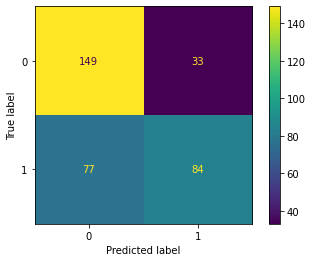

In [35]:
# Generamos la matriz de confusion
cm = confusion_matrix(y_test, predictions_lr)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

## Desicion tree

In [36]:
# Genermos y entrenamos el modelo de desicion tree
dt = DecisionTreeClassifier(max_leaf_nodes=6).fit(scaled_X, y_train)

In [37]:
# Evaluación del modelo: lo aplicamos a X test
# y extraemos las probabilidades que predice el modelo a partir de las cuales clasifica

predictions_dt = dt.predict(scaled_X_test)
probability_dt = dt.predict_proba(scaled_X_test)

In [38]:
# Obtenemos el ROC, AUC y la Matríz de Confusión

print('ROC-AUC: ', metrics.roc_auc_score(y_test, predictions_dt))
print('AUC: ', metrics.accuracy_score(y_test, predictions_dt))
print('Precision: ', metrics.precision_score(y_test, predictions_dt))
print('Recall: ', metrics.recall_score(y_test, predictions_dt))
print('F-1 Score: ', metrics.f1_score(y_test, predictions_dt))

ROC-AUC:  0.6970855231724797
AUC:  0.6880466472303207
Precision:  0.6238532110091743
Recall:  0.84472049689441
F-1 Score:  0.7176781002638524


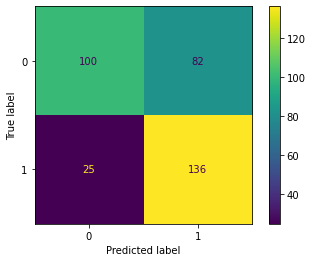

In [39]:
# Generamos la matriz de confusion
cm = confusion_matrix(y_test, predictions_dt)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

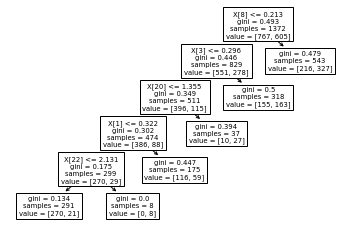

 X[8] =  Facility_Facility A 
 X[3] =  Benefit 
 X[20] =  PositionType_Executive Management


In [40]:
tree.plot_tree(dt)
plt.show()
print(' X[8] = ', X_train.columns[8], '\n X[3] = ', X_train.columns[3], '\n X[20] = ', X_train.columns[20])

## Random Forest

In [41]:
# Genermos y entrenamos el modelo de random forest
rf = RandomForestClassifier(max_depth = 10).fit(scaled_X, y_train)

In [42]:
# Evaluación del modelo: lo aplicamos a X test
# y extraemos las probabilidades que predice el modelo a partir de las cuales clasifica

predictions_rf = rf.predict(scaled_X_test)
probability_rf = rf.predict_proba(scaled_X_test)

In [43]:
# Obtenemos el ROC, AUC y la Matríz de Confusión

print('ROC-AUC: ', metrics.roc_auc_score(y_test, predictions_rf))
print('AUC: ', metrics.accuracy_score(y_test, predictions_rf))
print('Precision: ', metrics.precision_score(y_test, predictions_rf))
print('Recall: ', metrics.recall_score(y_test, predictions_rf))
print('F-1 Score: ', metrics.f1_score(y_test, predictions_rf))

ROC-AUC:  0.8029144768275203
AUC:  0.8075801749271136
Precision:  0.841726618705036
Recall:  0.7267080745341615
F-1 Score:  0.7799999999999999


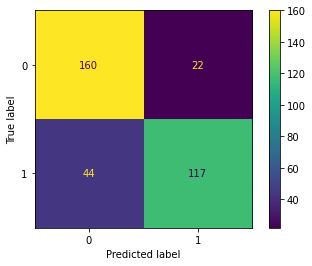

In [44]:
# Generamos la matriz de confusion
cm = confusion_matrix(y_test, predictions_rf)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

# Conclusiones

El modelo de Decision Tree y el Random Forest son los modelos que mejor han funcionado. 
* Decision Tree da un número considerable de falsos positivos, mientras que RandomForest da menos falsos positivos, pero un mayor número de falsos negativos, esto es, de personas que van a dejar la empresa y no se detectan. 
* Dependiendo de la estrategia de la empresa y de los recursos de que disponga, será más conveniente uno u otro. 
* Señalar que, en el Decision Tree, podemos ver que coge como variables predictoras tres de las variables que veíamos en el análisis exploratorio como aparentemente relacionadas con una mayor probabilidad de abandono de la empresa: Facility-FacilityA, Benefit y PositionType – Executive Manager. 